<h4 id="Makeup_Data">Make Some Data</h4>


In [1]:
# Import the library PyTorch    loss function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Training Data.
X = np.random.uniform(-5,5,60)

Y = np.linspace(1,10,60)+ np.random.normal(0,2)

Z= 2*X+3*Y


In [26]:
# Train test split

sprateor= int(0.8*len(X))

X_train= X[ : sprateor]
Y_train= Y[ : sprateor]
Z_train= Z[ : sprateor]

X_test= X[sprateor : ]
Y_test= Y[sprateor : ]
Z_test= Z[sprateor : ]

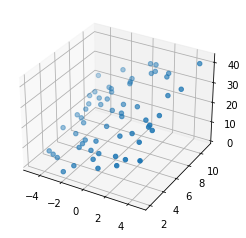

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z)

In [28]:
data_train= list(zip(X_train,Y_train))

In [56]:
Y_train

array([2.018999  , 2.17154137, 2.32408374, 2.47662611, 2.62916849,
       2.78171086, 2.93425323, 3.08679561, 3.23933798, 3.39188035,
       3.54442272, 3.6969651 , 3.84950747, 4.00204984, 4.15459222,
       4.30713459, 4.45967696, 4.61221933, 4.76476171, 4.91730408,
       5.06984645, 5.22238883, 5.3749312 , 5.52747357, 5.68001594,
       5.83255832, 5.98510069, 6.13764306, 6.29018544, 6.44272781,
       6.59527018, 6.74781256, 6.90035493, 7.0528973 , 7.20543967,
       7.35798205, 7.51052442, 7.66306679, 7.81560917, 7.96815154,
       8.12069391, 8.27323628, 8.42577866, 8.57832103, 8.7308634 ,
       8.88340578, 9.03594815, 9.18849052])

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_train,Z_train)


LinearRegression()

In [31]:
data_test= list(zip(X_test,Y_test))

In [57]:
z= lin_reg.predict(data_test)
z

array([26.56520615, 26.92835432, 33.87031268, 27.78143644, 34.75685916,
       31.90031942, 32.89850624, 22.43084389, 41.36115941, 27.70726559,
       34.14079376, 33.41012468])

In [33]:
z[0]

26.56520614703483

In [34]:
Z_test[0]

26.56520614703483

In [35]:
# Parameters.
lr = 0.01
training_steps = 4000
display_step = 50

<h2 id="Model_Cost">Regression without any module</h2>


In [36]:
# Create forward function for prediction

def forward(x,y):
    return W1*x + W2*y + b


# Create the MSE function for evaluate the result.

def myLoss(zhat, z):
    return tf.reduce_mean(tf.square(zhat - z))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(lr)

In [42]:
# Optimization process. 
def Fit():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = forward(X_train,Y_train)
        loss = myLoss(pred, Z_train)

    # Compute gradients.
    gradients = g.gradient(loss, [W1, W2, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W1, W2, b]))
    

In [43]:
# Weight and Bias, initialized randomly.
W1 = tf.Variable(0.0, name="weight")
W2 = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
#gradient_plot(zhat, w, loss.item(), epoch)

In [41]:
#gradient_plot = plot_diagram(X, Y, w, stop = 5)

<h4 id="Train">Train the Model</h4>


In [44]:
# Run training for the given number of steps.

LOSS=[]
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    Fit()
    
    if step % display_step == 0:
        pred = forward(X_train,Y_train)
        loss = myLoss(pred, Z_train)
        LOSS.append(loss)
        
        print("step: %i, loss: %f, W1: %f, W2: %f, b: %f" % (step, loss, W1.numpy(),W2.numpy(), b.numpy()))

step: 50, loss: 0.024179, W1: 1.991015, W2: 2.929082, b: 0.444767
step: 100, loss: 0.019043, W1: 1.992778, W2: 2.937172, b: 0.394795
step: 150, loss: 0.015002, W1: 1.993590, W2: 2.944236, b: 0.350409
step: 200, loss: 0.011818, W1: 1.994311, W2: 2.950505, b: 0.311014
step: 250, loss: 0.009310, W1: 1.994951, W2: 2.956070, b: 0.276047
step: 300, loss: 0.007335, W1: 1.995518, W2: 2.961009, b: 0.245012
step: 350, loss: 0.005778, W1: 1.996022, W2: 2.965392, b: 0.217466
step: 400, loss: 0.004552, W1: 1.996469, W2: 2.969283, b: 0.193017
step: 450, loss: 0.003586, W1: 1.996866, W2: 2.972737, b: 0.171316
step: 500, loss: 0.002825, W1: 1.997219, W2: 2.975802, b: 0.152056
step: 550, loss: 0.002225, W1: 1.997531, W2: 2.978522, b: 0.134961
step: 600, loss: 0.001753, W1: 1.997809, W2: 2.980937, b: 0.119787
step: 650, loss: 0.001381, W1: 1.998055, W2: 2.983080, b: 0.106320
step: 700, loss: 0.001088, W1: 1.998274, W2: 2.984982, b: 0.094367
step: 750, loss: 0.000857, W1: 1.998468, W2: 2.986671, b: 0.083

Text(14.5, 0.5, 'Cost')

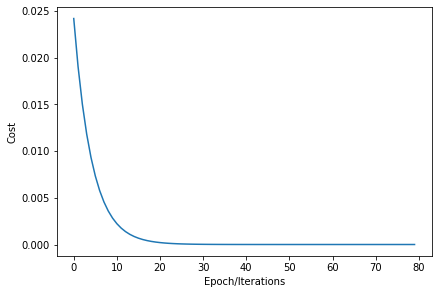

In [45]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [26]:
W2

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.92985564>

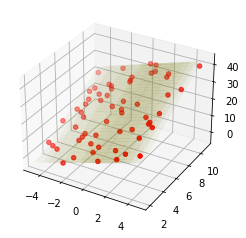

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y = X,Y
x, y = np.meshgrid(X, Y)
ax.plot_surface(x,y,np.array(W1*x + W2*y + b),color='y',alpha=0.025)
ax.scatter(X,Y,Z,c='r')